Exploratory Data Analisys consiste en obtener resultados e interpretaciones a partir de datos 

In [1]:
import pandas as pd

url = "https://raw.githubusercontent.com/zygmuntz/goodbooks-10k/master/books.csv"
libros = pd.read_csv(url)

In [2]:
#Recordemos como podemos obtener info de un dataframe
libros.info()
#libros.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   book_id                    10000 non-null  int64  
 1   goodreads_book_id          10000 non-null  int64  
 2   best_book_id               10000 non-null  int64  
 3   work_id                    10000 non-null  int64  
 4   books_count                10000 non-null  int64  
 5   isbn                       9300 non-null   object 
 6   isbn13                     9415 non-null   float64
 7   authors                    10000 non-null  object 
 8   original_publication_year  9979 non-null   float64
 9   original_title             9415 non-null   object 
 10  title                      10000 non-null  object 
 11  language_code              8916 non-null   object 
 12  average_rating             10000 non-null  float64
 13  ratings_count              10000 non-null  int6

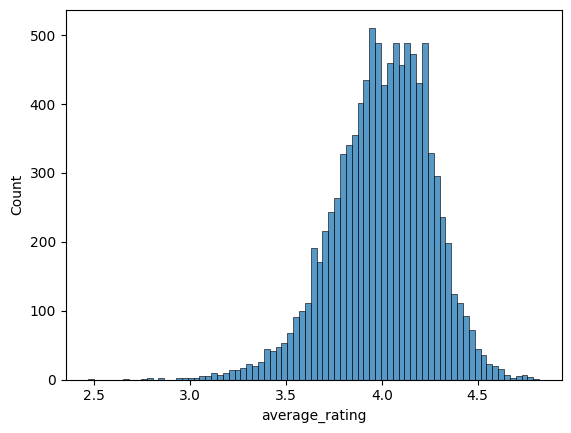

In [3]:
#Visualizacion basica
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(data = libros, x='average_rating')
plt.show()


In [4]:
#Mas info del dataframe
print(libros['original_publication_year'].min())
print(libros['original_publication_year'].max())
#sns.boxplot(data=libros, x='original_publication_year')
#plt.show()

-1750.0
2017.0


In [5]:
#Para contar cuantos registros tienen cierto string en una columna
libros['original_title'].str.contains('The').sum()

#Para contar el numero de strings unicos que tienen las columnas de tipo string
col_string=libros.select_dtypes('object')
for col in col_string.columns:
    print(f'La columna {col} tiene el siguiente numero de valores unicos:', col_string[col].nunique())

La columna isbn tiene el siguiente numero de valores unicos: 9300
La columna authors tiene el siguiente numero de valores unicos: 4664
La columna original_title tiene el siguiente numero de valores unicos: 9274
La columna title tiene el siguiente numero de valores unicos: 9964
La columna language_code tiene el siguiente numero de valores unicos: 25
La columna image_url tiene el siguiente numero de valores unicos: 6669
La columna small_image_url tiene el siguiente numero de valores unicos: 6669


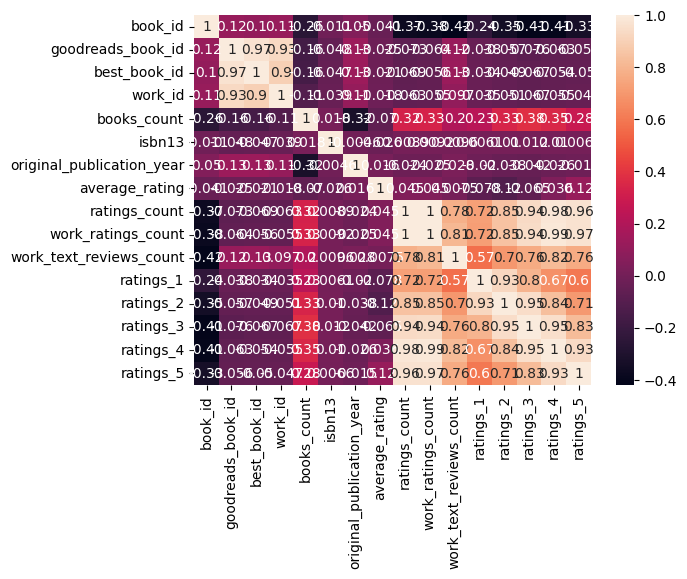

In [6]:
#Para entender la correlacion entra las diferentes columnas de un dataframe
libros.corr(numeric_only=True)
sns.heatmap(libros.corr(numeric_only=True), annot=True)
plt.show()

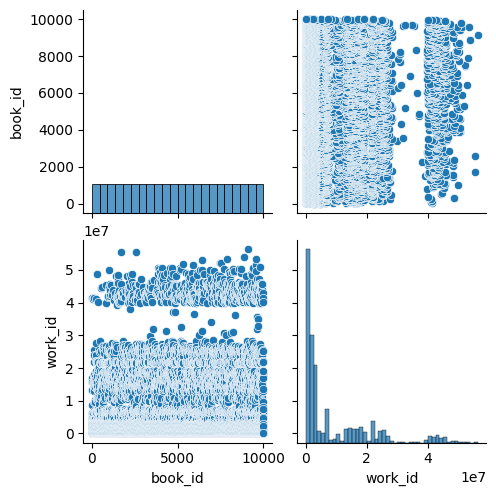

In [7]:
#Vistazo rapido a las relaciones que pueden guardar los diferentes campos de nuestro df
sns.pairplot(data=libros, vars=['book_id', 'work_id'])
plt.show()

<Axes: xlabel='original_publication_year', ylabel='Count'>

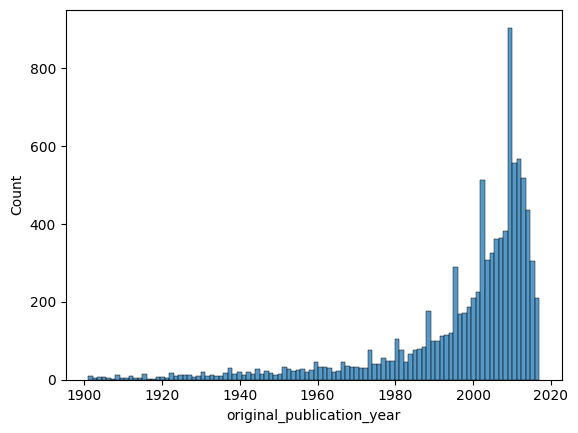

In [8]:
#Para ver relaciones de variables categoricas

libros=libros[libros['original_publication_year']>1900]
sns.histplot(data=libros, x='original_publication_year', bins=100)#, hue='average_rating')

